# Lecture 1
## Ramadharsh Vanchinathan
## DATA 4319


## Perceptron Learning Algorithm (PLA)

**Binary Classifier**

Rosenblatt ($\approx$ 1950)

* Beginning of Artificial Intelligence(AI)

Components of the Problem:

* $X$ = Set of all features, $Y$ = Set of all labels

$D = {(x^1,y^1),...,(x^n,y^n))}$, $Y$ = {-1,1}, $X \subseteq \mathbb{R}^d$ 

Consider the iris dataset

suppose $Y$ = {-1,1} where -1 = "Virginica" and 1 = "Versicolor"(Labels), $X$ = Measurements of the Flower (Features)

let $w \in \mathbb{R}^d$ be weights, let $\theta$ = threshold

if $w^Tx > \theta \rightarrow \hat y = 1$ 

* If weight transposed x is above a threshold, y is 1

if $w^Tx < \theta \rightarrow \hat y = -1$ 

* If weight transposed x is below a threshold, y is -1

let -b = $\theta$, $b$ = bias

let $w$ = $\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$, $\overline w$ = $\begin{bmatrix} b\\ w_1 \\ w_2 \end{bmatrix}$

* if $w^Tx + b > 0, \hat y = 1$

* if $w^Tx + b < 0, \hat y = -1$

$w^Tx + b = w_1 x_1 + w_2x_2 + b$

* if $x^i = \begin{bmatrix} x^i_1 \\ x^i_2 \end{bmatrix}$,then $\overline{x}^i = \begin{bmatrix} 1.0\\ x^i_1 \\ x^i_2 \end{bmatrix}$

* if $w = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$,then $\overline w = \begin{bmatrix}b\\ w_1 \\ w_2  \end{bmatrix}$

$w^Tx + b = \overline w^T \overline x$

$g(x) = sign(\overline w^T \overline x)$, $sign()$ returns 1 if $\overline w^T \overline x$ > 0, -1 if $\overline w^T \overline x$ < 0

$g(x^i) \approx y(x^i)$

### Algorithm

Goal: Find the best values for weights

Given $(x,y) \in D$, compute $\hat y = sign(\overline w^T \overline x)$. If $\hat y \neq y$, $\overline w \rightarrow \overline w +  y \overline x$ (Perceptron Update Rule)

Steps of the Algorithm:

1. Initialize $\overline w$ randomly

1. For each $(x,y) \in D$ , if $\hat y \neq y $, $\overline w \rightarrow \overline w + y \overline x$

    * If the data is linearly separable, PLA will find a perfect solution for g.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Import Data
data = pd.read_csv("data/diabetes.csv")
data 

#

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


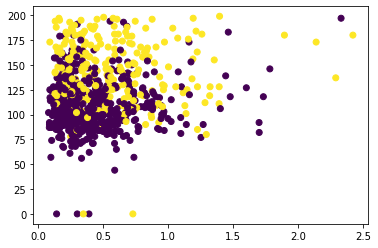

In [3]:
plt.scatter(data.DiabetesPedigreeFunction,data.Glucose, c= data.Outcome)

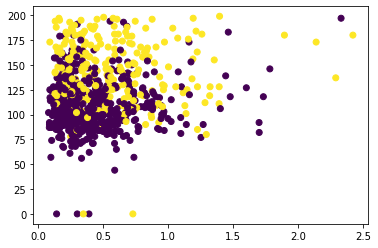

In [4]:
# Create X and Y Matrices
x_data = np.asarray(data[['DiabetesPedigreeFunction','Glucose']])
y_data = np.asarray(data[['Outcome']])
for i in range(len(y_data)):
    if y_data[i] == 0:
        y_data[i] = -1

# Plot x_data

plt.scatter(data.DiabetesPedigreeFunction,data.Glucose, c= data.Outcome)

### Implementation

Suppose $X \subseteq \mathbb{R}^2$ and Y = $\begin{Bmatrix} -1 ,1 \end{Bmatrix}$.

1. Initialize $\overline w \in \mathbb{R}^3$ randomly

1. For each $(x,y) \in D$...

    a. Form $\overline x = [1.0,x_1,x_2]^T$

    b. If $sign(\overline w ^T \overline x) \neq y$, update $\overline w$ with $\overline w \rightarrow \overline w + y \overline x$

1. Output is Final Hypothesis : $g(x) = sign(\overline w ^T \overline x)$



If epoch = k, repeat (2) k times.




In [5]:
# Write sign function
def sign(weights, x):
    x_bar = np.array([1.0,x[0],x[1]])
    if weights.T @ x_bar > 0:
        return 1
    else:
        return -1

# Write Perceptron Update Rule(PUR) function
def PUR(weights, x, y):
    if sign(weights,x) != y:
        weights = weights + y * np.array([1.0,x[0],x[1]])
    
    return weights

# PLA Function
def PLA(X,Y, epochs = 1000):
    w = np.array([random.random(),random.random(),random.random()])

    
    for i in range(epochs):
        for j in range(len(X)):
            w = PUR(w,X[j],Y[j])
        


    return w

In [6]:
w = PLA(x_data,y_data,epochs = 10000)
x = np.arange(0,4)
y = (-w[1]*x - w[0])/w[2]

# NEED TO ADD PLOT TITLE, LABELS AND LEGEND

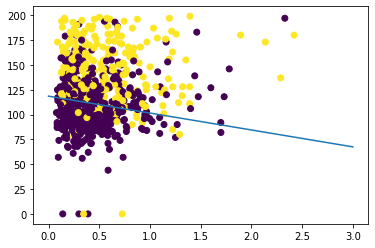

In [7]:
plt.scatter(x_data[:,0],x_data[:,1], c= y_data)

plt.plot(x,y)

In [8]:
def predictor(weights,x):
    if sign(weights,x) == 1:
        return "Diabetic"
    else:
        return "Not Diabetic"


In [9]:
data.Outcome[70]

1

In [10]:
predictor(w, (data.DiabetesPedigreeFunction[70],data.Glucose[70]))


'Not Diabetic'

In [11]:
r = random.randint(0,99)

print("True Label: ", data.Outcome[r])
print("Predicted Label: ", predictor(w, (data.DiabetesPedigreeFunction[r],data.Glucose[r])))

True Label:  1
Predicted Label:  Not Diabetic


The Perceptron Learning Algorithm, as one of the first machine learning algorithm, is only highly accurate when the data is linearly separable. So while it is not a good fit for this diabetes dataset, its low computational overhead makes it ideal for small, quick and linearly separable data.